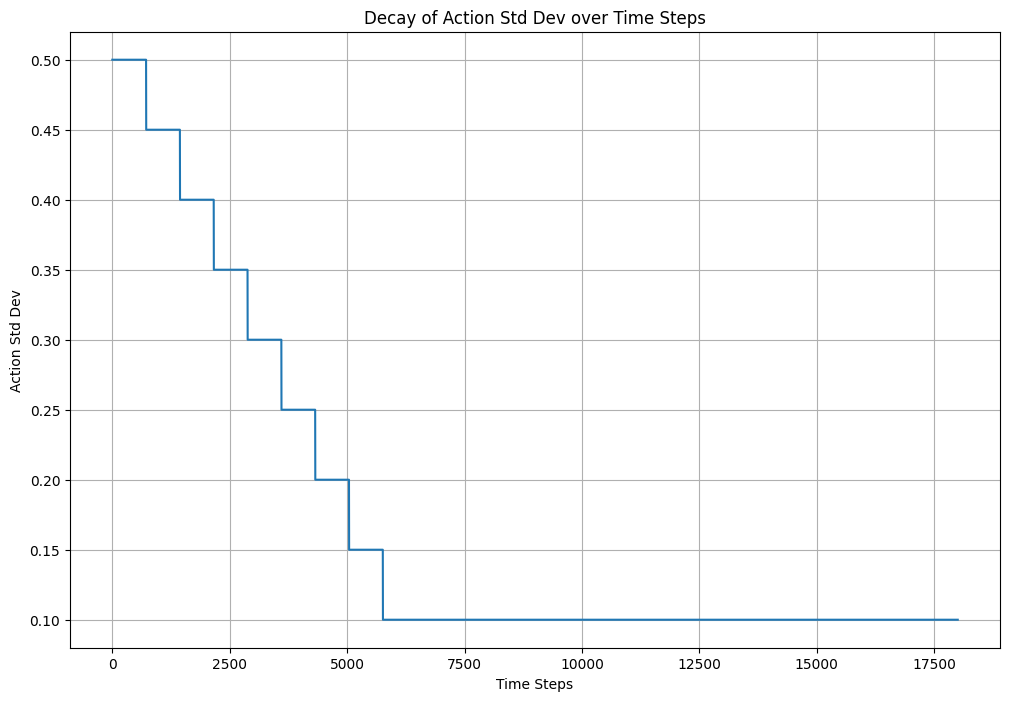

In [3]:
import matplotlib.pyplot as plt

episodes = 300
time_steps = 60
total_steps = time_steps * episodes


update_timestep = time_steps * 2
initial_action_std = 0.5
action_std_decay_rate = 0.05
min_action_std = 0.1
action_std_decay_freq = total_steps // 25 # Frequency of decay



current_action_std = initial_action_std
std_devs = [current_action_std]

for time_step in range(1, total_steps + 1):
    if time_step % action_std_decay_freq == 0:
        current_action_std -= action_std_decay_rate
        current_action_std = round(current_action_std, 4)
        if current_action_std < min_action_std:
            current_action_std = min_action_std
    std_devs.append(current_action_std)
plt.figure(figsize=(12, 8))
plt.plot(range(total_steps + 1), std_devs)
plt.xlabel('Time Steps')
plt.ylabel('Action Std Dev')
plt.title('Decay of Action Std Dev over Time Steps')

# for step in range(update_timestep, total_steps + 1, update_timestep):
#     plt.axvline(x=step, color='r', linestyle='-', alpha=0.5)

plt.grid(True)
plt.show()


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# sub_folder = 'model_metric_data/ppo'
# sub_folder = '../trained/ppo'
# sub_folder = '../trained/continous'

# model_folder = f'{sub_folder}/66ep_rf_2_30rps8kepochs5alpha50scale_a0priority_newloading_instantscale_NOreseting_vari_res_pretrained'
# model_folder = f'{sub_folder}/310ep_rf_2_20rps10kepochs5alpha10epupdate_independent_state_instantscale_1000resources'


model_folder = 'model_metric_data/ppo/210ep_rf_2_20rps10kepochs5alpha10epupdate50scale_a_1000resources'
# model_folder = '../trained/ppo/400ep_rf_2_30rps8kepochs5alpha50scale_a0priority_newloading_instantscale_NOreseting_vari_res'

ep_summed_rewards_df = pd.read_csv(f'{model_folder}/ep_summed_rewards.csv')
ep_latencies_df = pd.read_csv(f'{model_folder}/ep_latencies.csv')
# resource_dev_df = pd.read_csv(f'{model_folder}/resource_dev.csv')

num_agents = 3
agent_ep_summed_rewards = []
for agent_idx in range(num_agents):
    filename = f'{model_folder}/agent_{agent_idx}_ep_summed_rewards.csv'
    agent_rewards_df = pd.read_csv(filename)
    agent_ep_summed_rewards.append(agent_rewards_df)

In [41]:
agents_mean_latenices = []
for agent_idx in range(num_agents):
    filename = f'{model_folder}/agent_{agent_idx}_ep_mean_latencies.csv'
    agent_latencies_df = pd.read_csv(filename)
    agents_mean_latenices.append(agent_latencies_df)

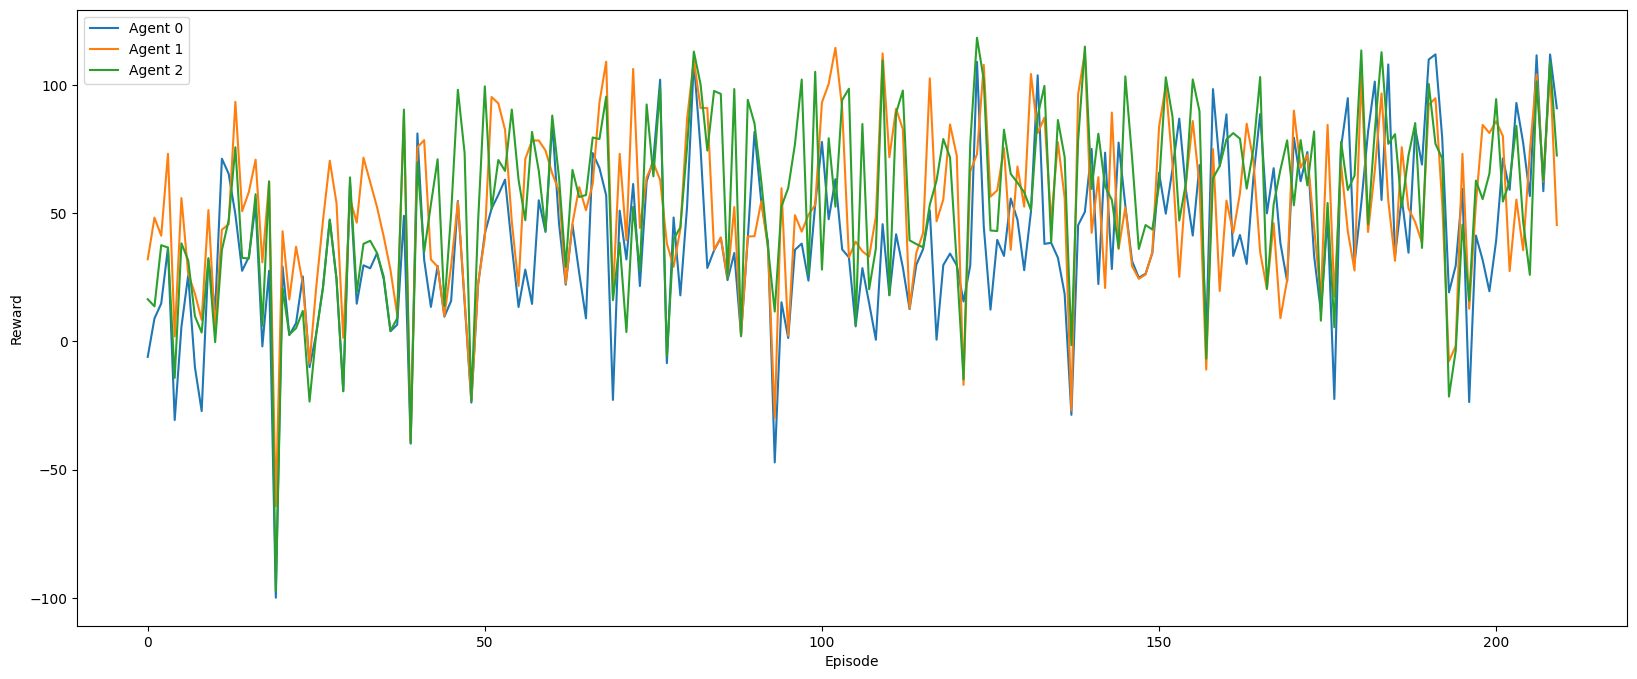

In [42]:
fig, ax = plt.subplots(figsize=(20, 8))
for i in range(len(agent_ep_summed_rewards)):
    ax.plot(agent_ep_summed_rewards[i]['Episode'], agent_ep_summed_rewards[i]['Reward'], label=f'Agent {i}')
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
plt.show()


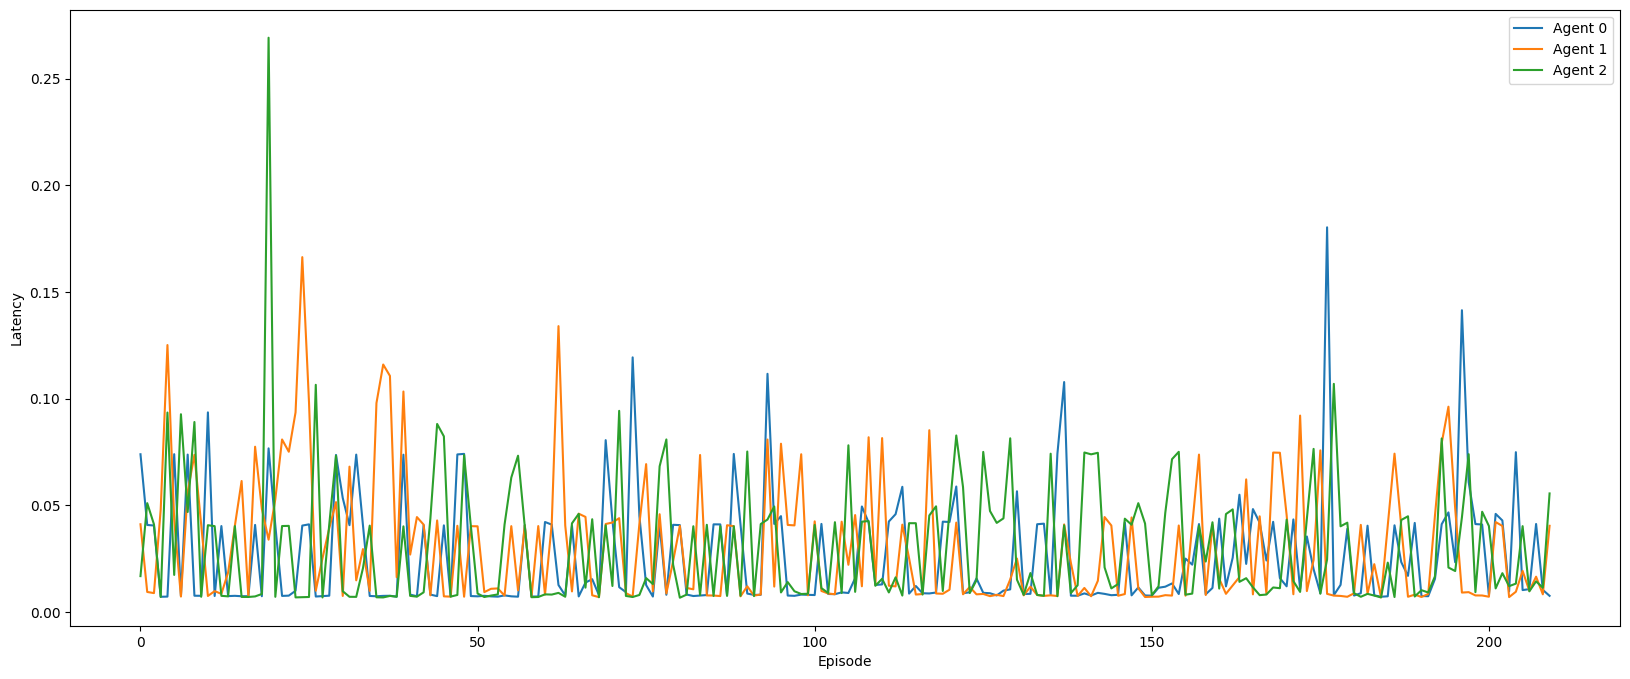

In [43]:
fig, ax = plt.subplots(figsize=(20, 8))
for i in range(len(agents_mean_latenices)):
    ax.plot(agents_mean_latenices[i]['Episode'], agents_mean_latenices[i]['Latency'], label=f'Agent {i}')
ax.set_xlabel('Episode')
ax.set_ylabel('Response Time')
ax.legend()
plt.show()


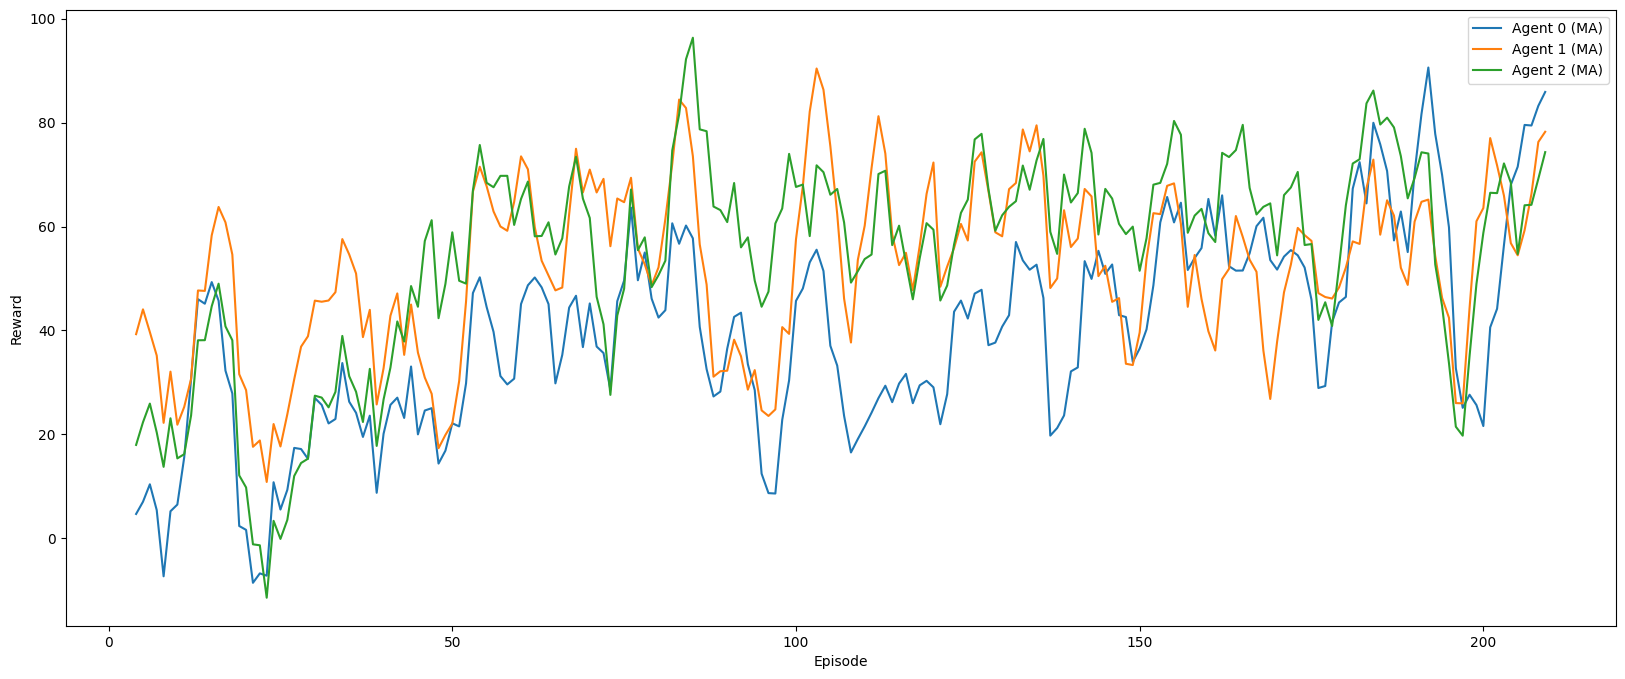

In [44]:
fig, ax = plt.subplots(figsize=(20, 8))
window_size = 5

for i in range(len(agent_ep_summed_rewards)):
    rewards_smoothed = moving_average(agent_ep_summed_rewards[i]['Reward'], window_size)
    episodes_adjusted = agent_ep_summed_rewards[i]['Episode'][window_size-1:]
    ax.plot(episodes_adjusted, rewards_smoothed, label=f'Agent {i} (MA)')

ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
plt.show()

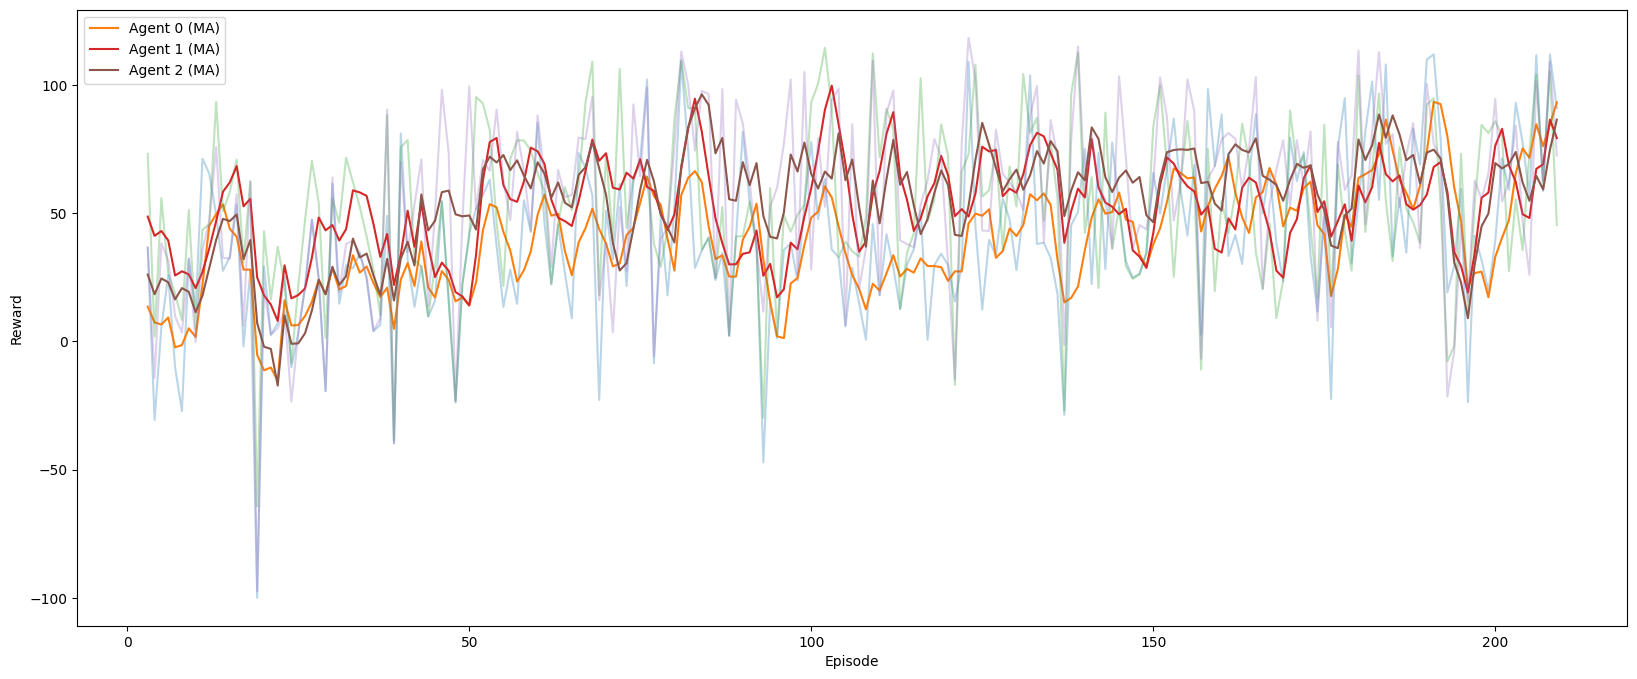

In [45]:
fig, ax = plt.subplots(figsize=(20, 8))
window_size = 4

for i in range(len(agent_ep_summed_rewards)):
    reward = agent_ep_summed_rewards[i]['Reward']
    rewards_smoothed = moving_average(reward, window_size)
    episodes = agent_ep_summed_rewards[i]['Episode']

    episodes_adjusted = episodes[window_size-1:]
    reward_adjusted = reward[window_size-1:]
    ax.plot(episodes_adjusted, reward_adjusted, alpha=0.3)

    ax.plot(episodes_adjusted, rewards_smoothed, label=f'Agent {i} (MA)')

ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.legend()
plt.show()

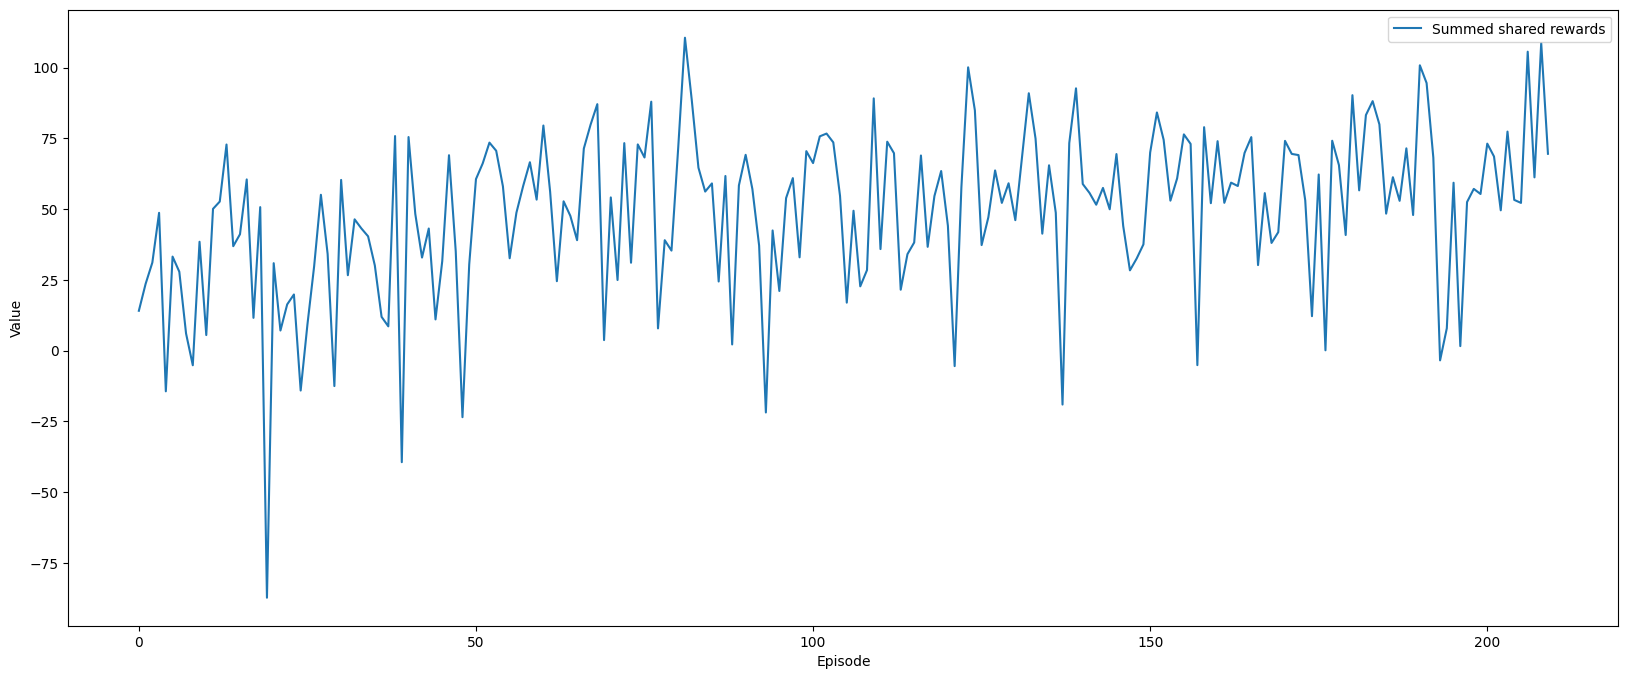

In [7]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(ep_summed_rewards_df['Reward'], label='Summed shared rewards')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.legend()
plt.show()


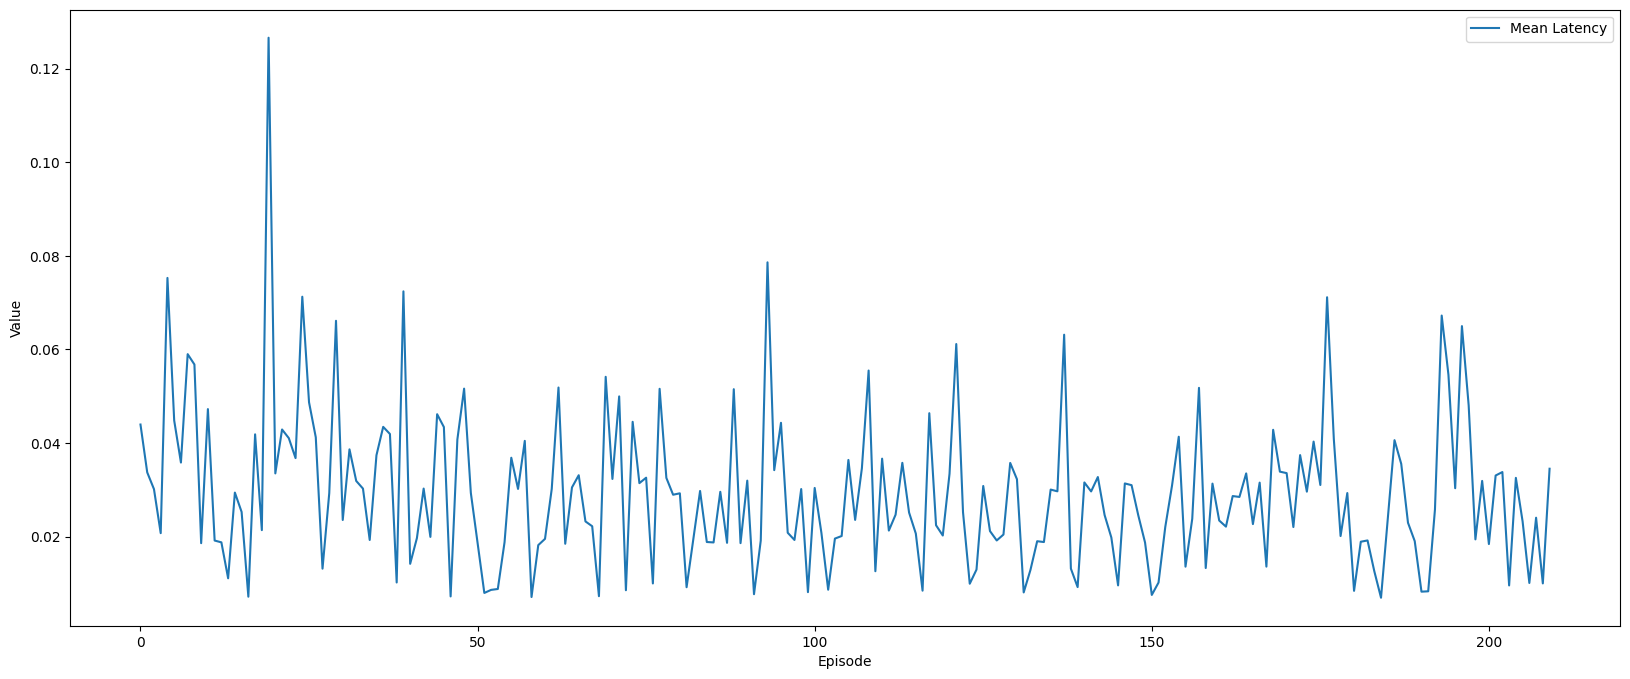

In [8]:
fig, ax = plt.subplots(figsize=(20, 8))
# ep_latencies_df_smoothed = moving_average(ep_latencies_df['Mean Latency'], window_size)
# plt.plot(ep_latencies_df_smoothed, label='Mean Latency (MA)')
plt.plot(ep_latencies_df['Mean Latency'], label='Mean Rensponse Time')
plt.xlabel('Episode')
plt.ylabel('Value')
plt.legend()
plt.show()

All steps latencies and rewards

In [9]:
# model_folder = f'{sub_folder}/1ep1000resources50rps1000interval0.5alpha50scale_a0.5gl'

rf = 2


# model_folder = f'{sub_folder}/20ep1000resources_rf_2_50rps1000interval8kepochs0.75alpha50scale_a0.5gl'
latenices_step_shared_rewards_df = pd.read_csv(f'{model_folder}/step_latency_shared_reward.csv')
latenices_step_df = pd.read_csv(f'{model_folder}/step_latencies.csv')

num_agents = 3
agent_step_util_rewards_dfs = []
for agent_idx in range(num_agents):
    filename = f'{model_folder}/agent_{agent_idx}_step_util_rewards.csv'
    agent_rewards_df = pd.read_csv(filename)
    agent_step_util_rewards_dfs.append(agent_rewards_df)

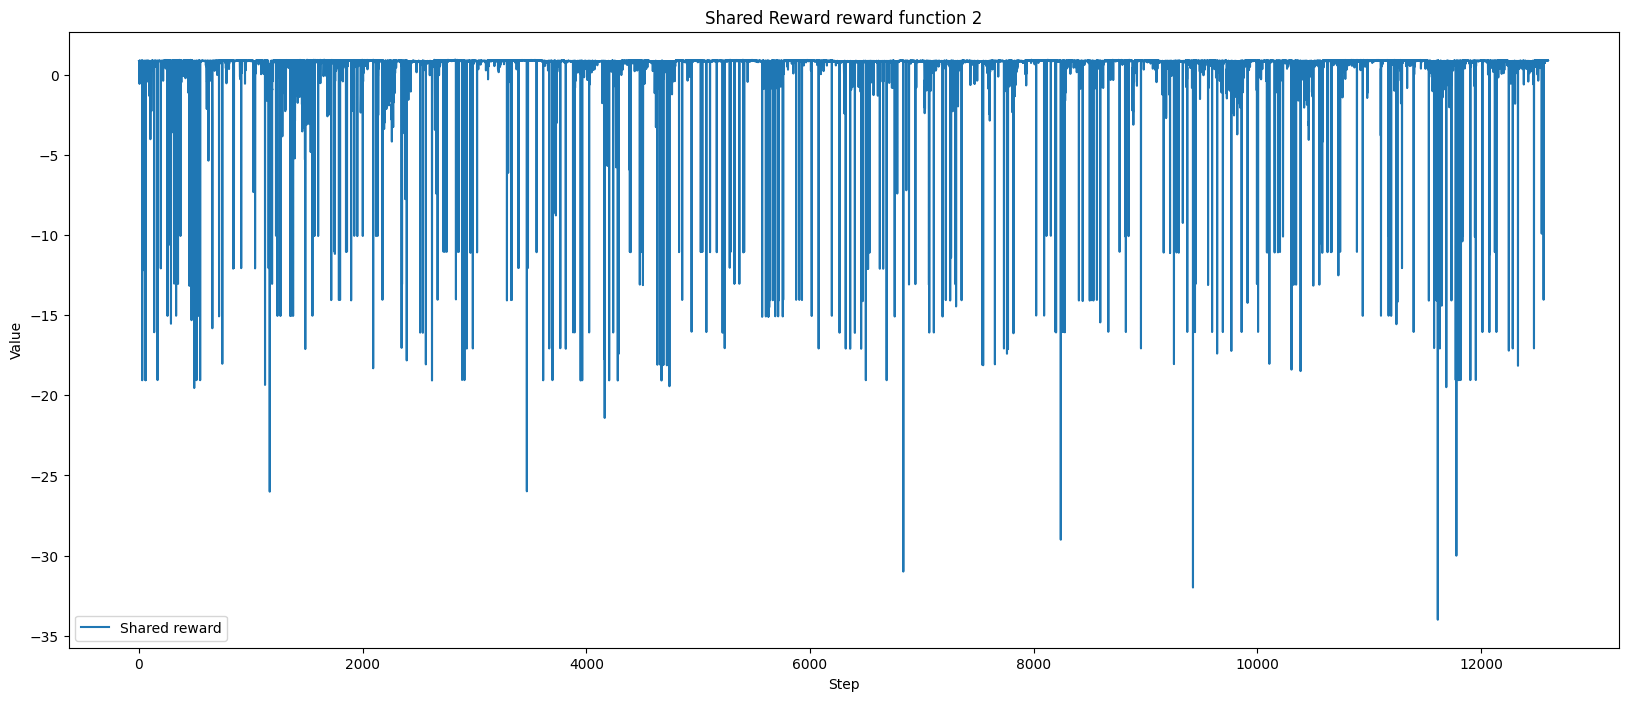

In [10]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(latenices_step_shared_rewards_df['Shared reward'],  label='Shared reward')
# plt.plot(moving_average(latenices_step_shared_rewards_df['Shared reward'], 10),  label='Shared reward')
plt.plot
plt.xlabel('Step')
plt.ylabel('Value')
plt.title(f'Shared Reward reward function {rf}')
plt.legend()
plt.show()

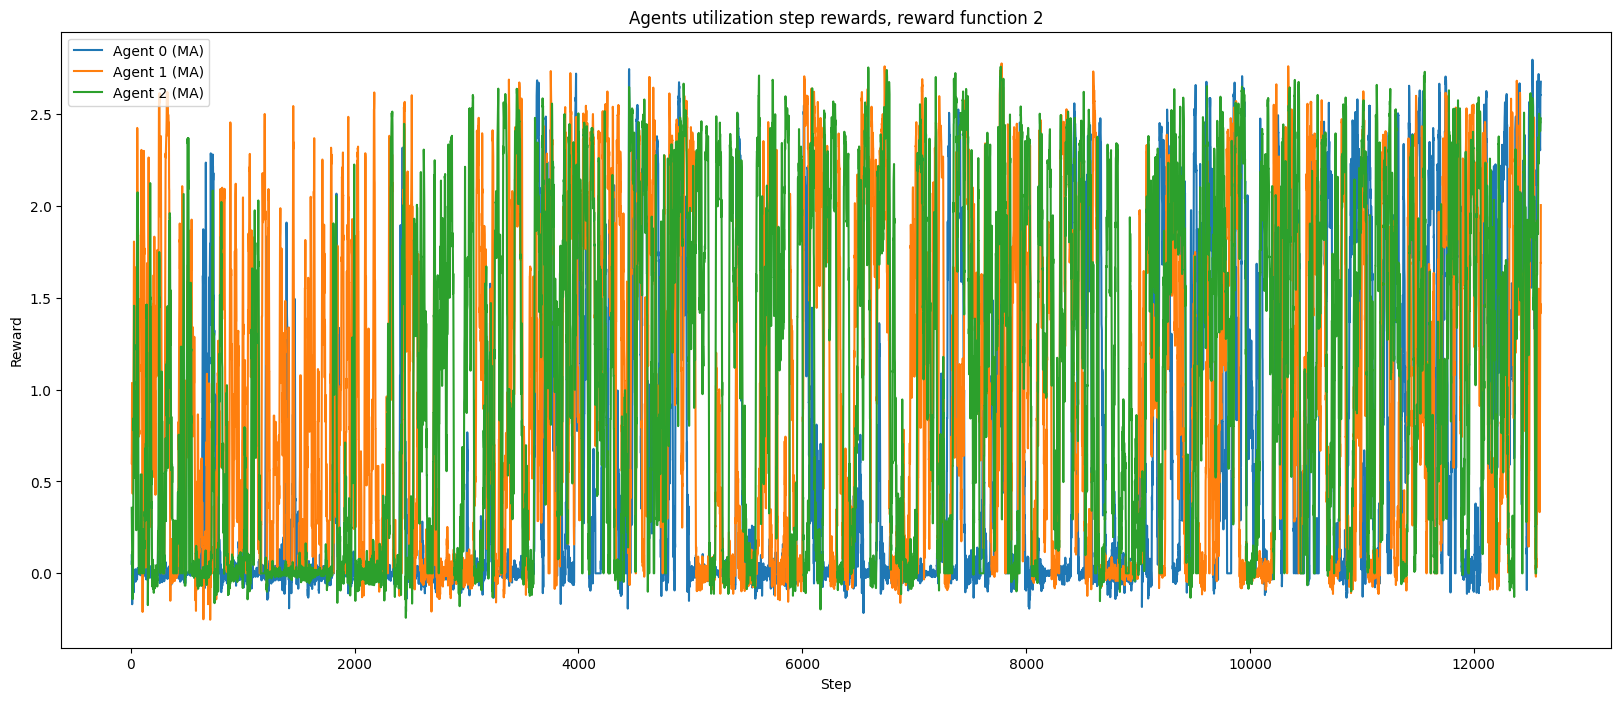

In [11]:
fig, ax = plt.subplots(figsize=(20, 8))
window_size = 10
for i in range(len(agent_step_util_rewards_dfs)):
    # ax.plot(agent_step_util_rewards_dfs[i]['Step'], agent_step_util_rewards_dfs[i]['Reward'], label=f'Agent {i}')
    rewards_smoothed = moving_average(agent_step_util_rewards_dfs[i]['Reward'], window_size)
    episodes_adjusted = agent_step_util_rewards_dfs[i]['Step'][window_size-1:]
    ax.plot(episodes_adjusted, rewards_smoothed, label=f'Agent {i} (MA)')
ax.set_xlabel('Step')
ax.set_ylabel('Reward')
ax.set_title(f'Agents utilization step rewards, reward function {rf}')
ax.legend()
plt.show()


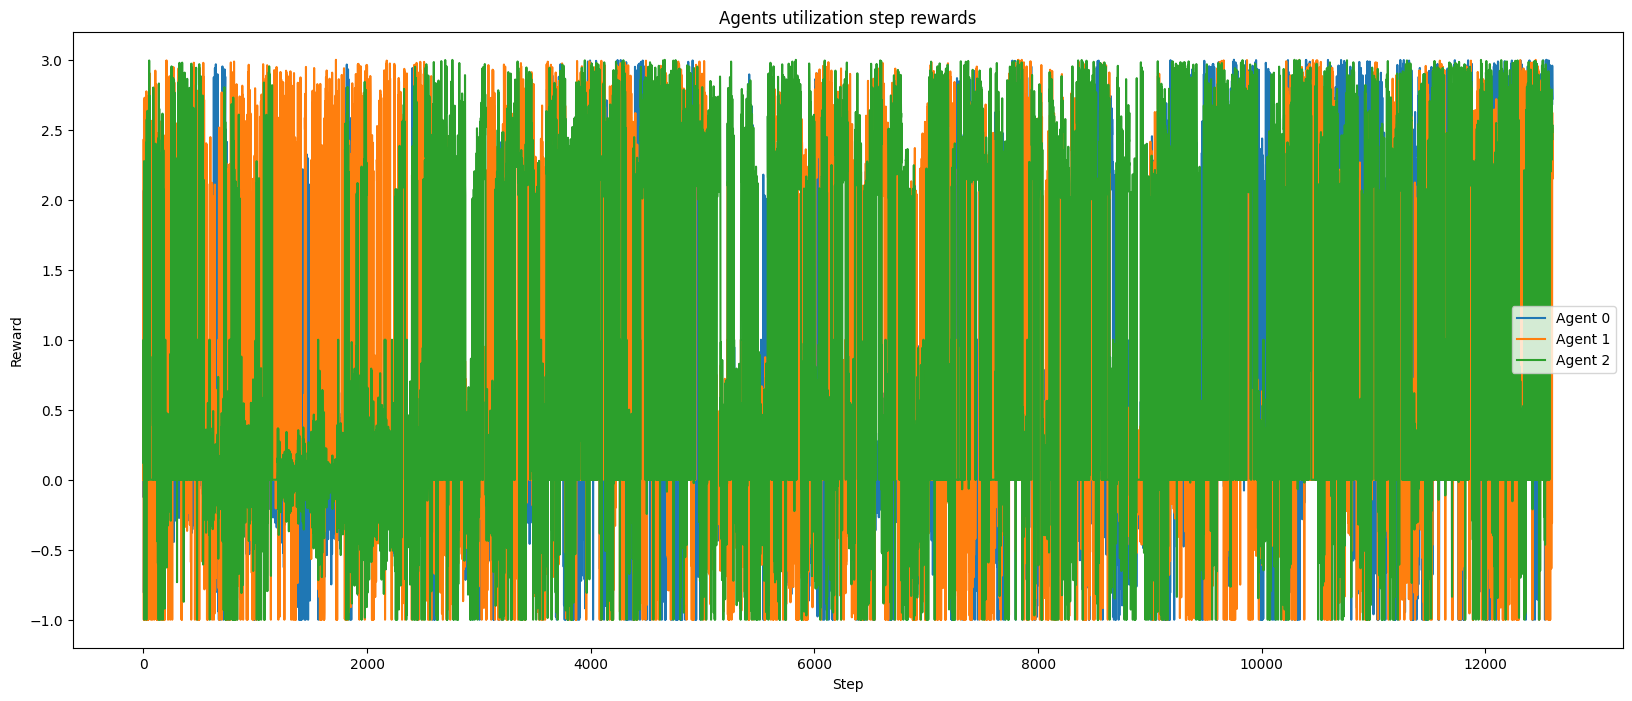

In [12]:
fig, ax = plt.subplots(figsize=(20, 8))
for i in range(len(agent_step_util_rewards_dfs)):
    ax.plot(agent_step_util_rewards_dfs[i]['Step'], agent_step_util_rewards_dfs[i]['Reward'], label=f'Agent {i}')
ax.set_xlabel('Step')
ax.set_ylabel('Reward')
ax.set_title('Agents utilization step rewards')
ax.legend()
plt.show()


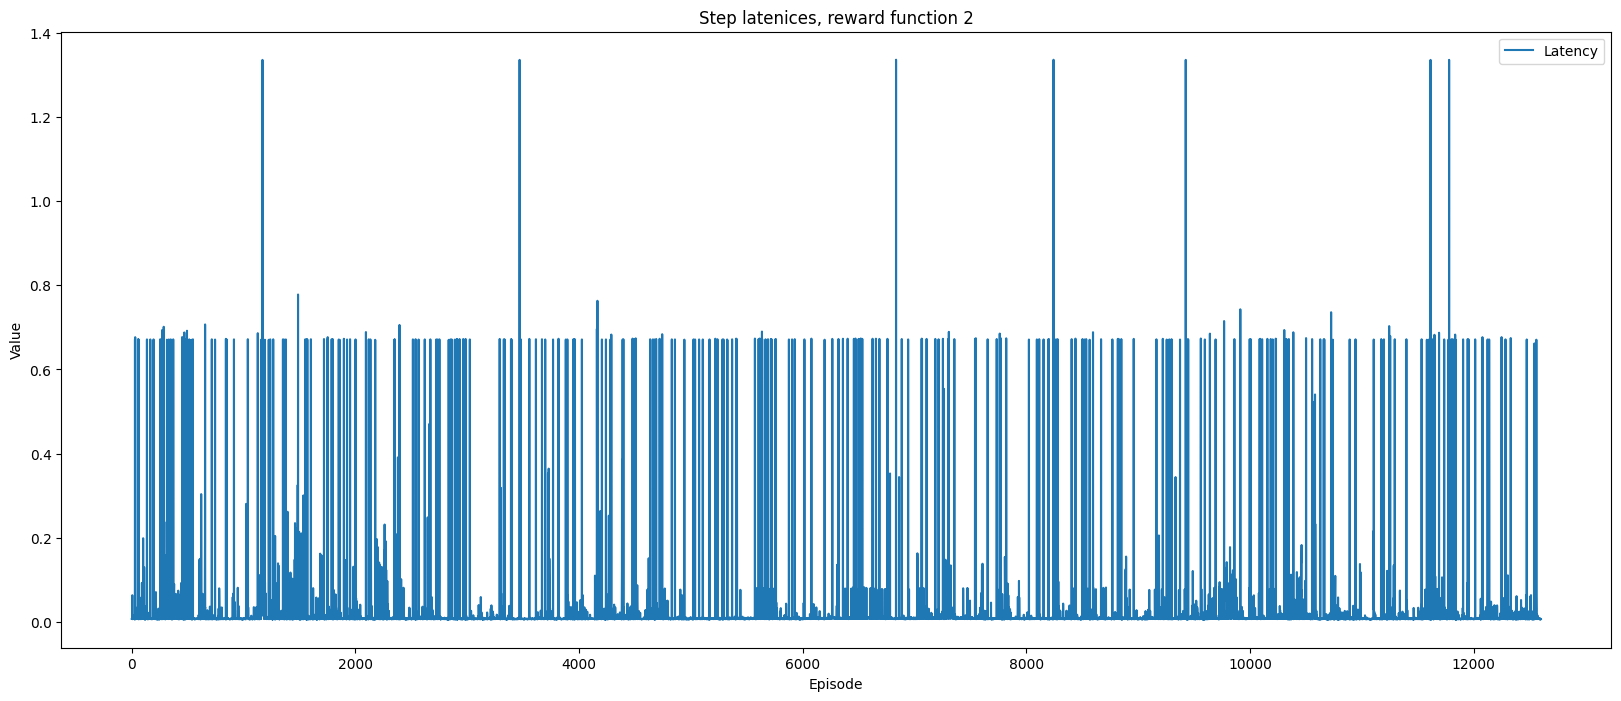

In [13]:
fig, ax = plt.subplots(figsize=(20, 8))
plt.plot(latenices_step_df['Latency'],  label='Latency')
# plt.plot(moving_average(latenices_step_df['Latency'], 10),  label='Latency')
plt.plot
plt.xlabel('Episode')
plt.ylabel('Value')
plt.title(f'Step latenices, reward function {rf}')
plt.legend()
plt.show()